In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import igraph
import seaborn as sns
import wot
###import packages
from scEasyMode import mousefilter
from scEasyMode import clusterplot
from scEasyMode import pymulti
from scEasyMode import sceasy

## read in data

In [2]:
###readin
osi= sceasy.read('osi_only.preprocessed')

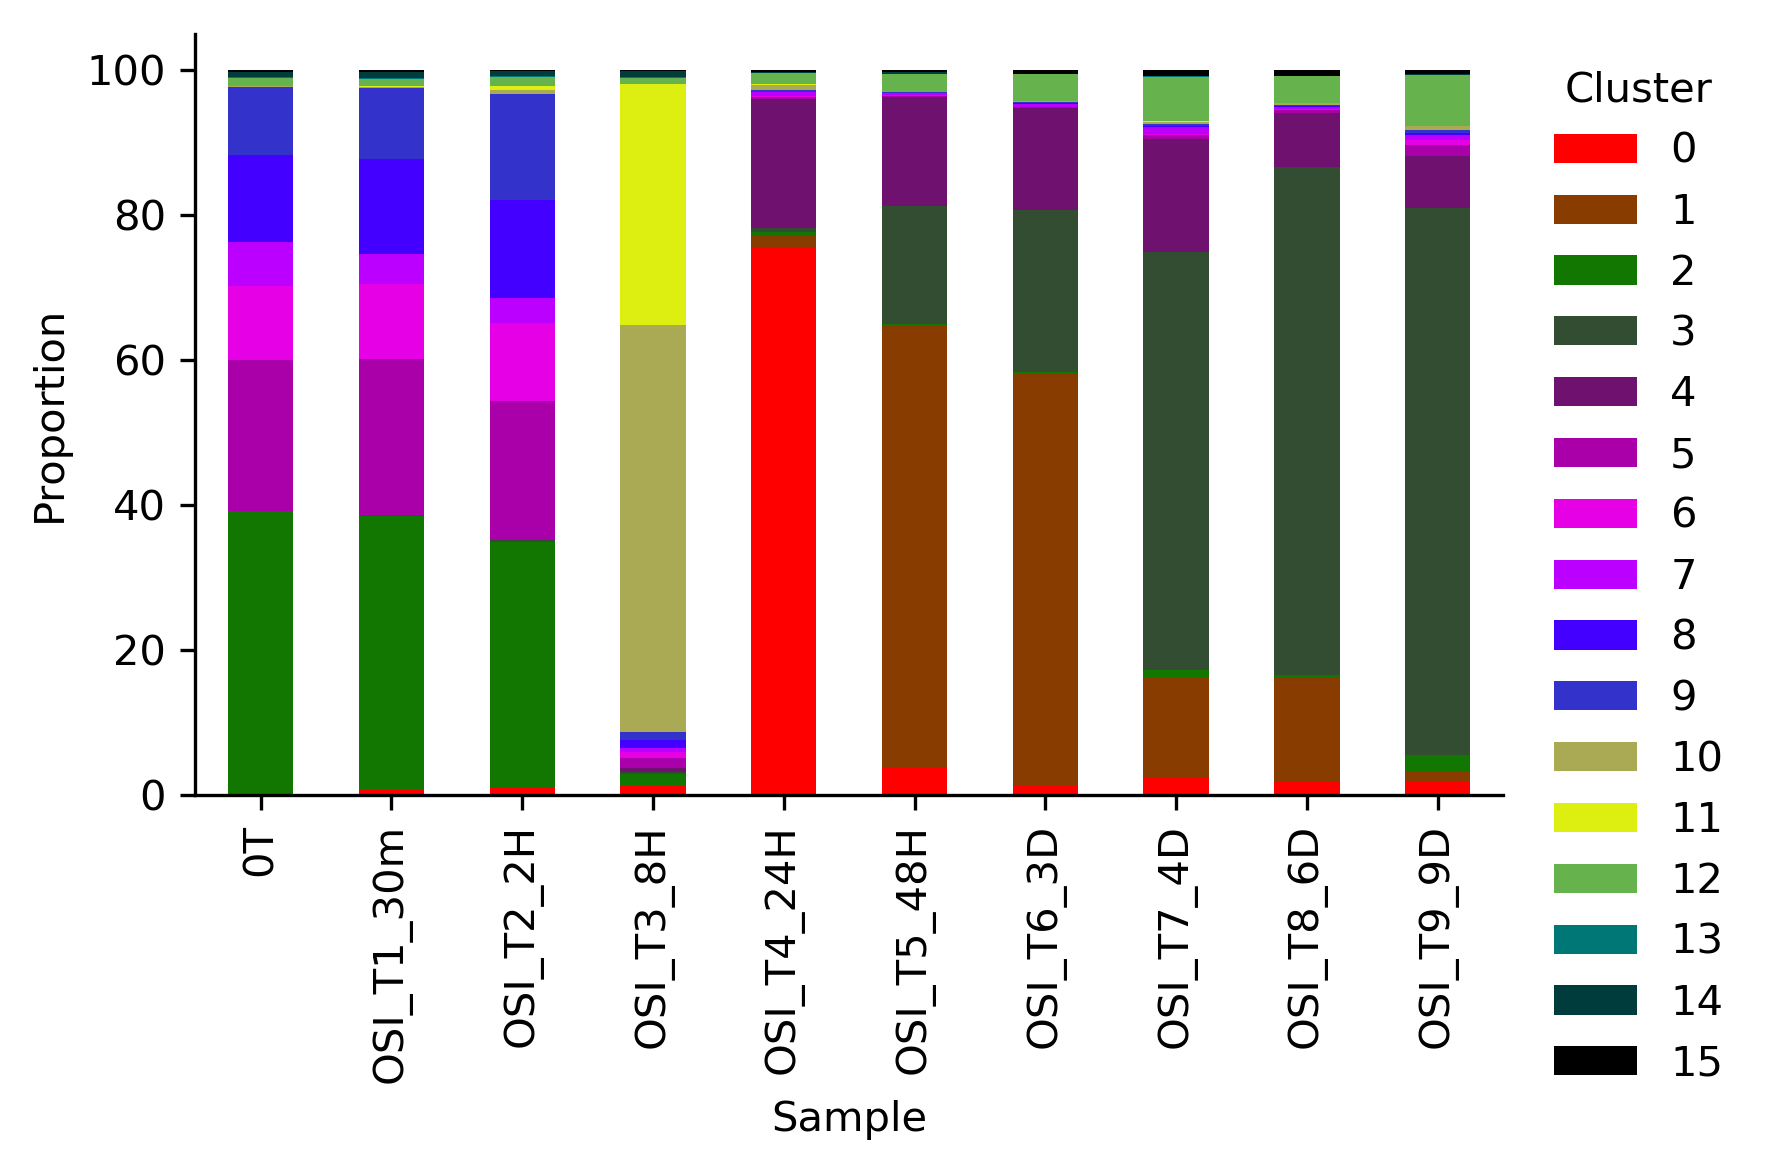

In [3]:
clusterplot.plot(osi,covariates=['leiden'],sample='sample',cluster_palette=['Red','Green','Purple','Magenta','Blue','Yellow','Teal','Black'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('figures/treatment_time_clusters.pdf')

## Define stable states

In [4]:
statedict = {
    9:1,
    8:1,
    7:1,
    6:1,
    5:1,
    2:1,
    10:2,
    11:2,
    0:3,
    0:3,
    1:4,
    3:4,
    4:4,
    12:0,
    13:0,
    14:0,
    15:0
}


In [5]:
osi.obs['state'] = osi.obs.apply(lambda row: str(statedict[int(row['leiden'])]),axis=1)

In [6]:
osi = osi[osi.obs['state']!=str(0)]

Trying to set attribute `.obs` of view, making a copy.
... storing 'state' as categorical


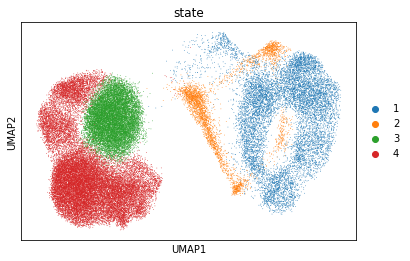

In [7]:
sc.pl.umap(osi,color='state')

In [8]:
### change things over into continuous time
sample_dict = {
    '0T':0,
    'OSI_T1_30m':0.5,
    'OSI_T2_2H':2,
    'OSI_T3_8H':8,
    'OSI_T4_24H':24,
    'OSI_T5_48H':48,
    'OSI_T6_3D':72,
    'OSI_T7_4D':96,
    'OSI_T8_6D':144,
    'OSI_T9_9D':216,
}
###
osi.obs['time'] = osi.obs.apply(lambda row: sample_dict[row['sample']],axis=1) 
osi.obs['group'] = osi.obs.apply(lambda row: str(row['sample'])[:3],axis=1) 


## Define gene signatures for each state

In [9]:
sc.tl.rank_genes_groups(osi,groupby='state',method='logreg')

... storing 'group' as categorical
/home/johnny/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/johnny/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


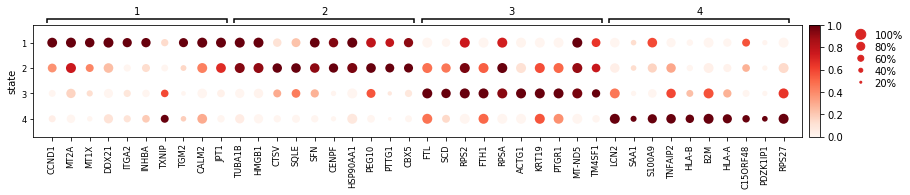

In [10]:
sc.pl.rank_genes_groups_dotplot(osi,dendrogram=False,standard_scale='var')

In [33]:
scores = pd.DataFrame(osi.uns['rank_genes_groups']['scores'])
names = pd.DataFrame(osi.uns['rank_genes_groups']['names'])
dfex = pd.concat([scores,names],axis=1)
dfex.to_csv('df_ex.csv')

In [ ]:
# help(wot.ot.OTModel)